<a href="https://colab.research.google.com/github/ArundatiGarikipeta/ybiintershipprojects/blob/main/Bank_churn_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bank Churn Model

# Import Library

In [3]:
import pandas as pd

In [4]:
import numpy as np

In [5]:
import matplotlib.pyplot as plt


In [6]:
import seaborn as sns

# Import Data

In [7]:
df = pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/Bank%20Churn%20Modelling.csv')

In [8]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerId        10000 non-null  int64  
 1   Surname           10000 non-null  object 
 2   CreditScore       10000 non-null  int64  
 3   Geography         10000 non-null  object 
 4   Gender            10000 non-null  object 
 5   Age               10000 non-null  int64  
 6   Tenure            10000 non-null  int64  
 7   Balance           10000 non-null  float64
 8   Num Of Products   10000 non-null  int64  
 9   Has Credit Card   10000 non-null  int64  
 10  Is Active Member  10000 non-null  int64  
 11  Estimated Salary  10000 non-null  float64
 12  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [10]:
df.duplicated('CustomerId').sum()

0

In [11]:
df = df.set_index('CustomerId')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 15634602 to 15628319
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Surname           10000 non-null  object 
 1   CreditScore       10000 non-null  int64  
 2   Geography         10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Tenure            10000 non-null  int64  
 6   Balance           10000 non-null  float64
 7   Num Of Products   10000 non-null  int64  
 8   Has Credit Card   10000 non-null  int64  
 9   Is Active Member  10000 non-null  int64  
 10  Estimated Salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 1015.6+ KB


# Encoding

In [13]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [14]:
df.replace({'Geography' :{'France' : 2, 'Germany':1, 'Spain' :0}}, inplace=True)

In [15]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [16]:
df.replace({'Gender': {'Male': 0, 'Female':1}}, inplace=True)

In [17]:
df['Num Of Products'].value_counts()

1    5084
2    4590
3     266
4      60
Name: Num Of Products, dtype: int64

In [18]:
df.replace({'Num Of Products': {1:0, 2:1, 3:1, 4:1}}, inplace=True)

In [19]:
df['Has Credit Card'].value_counts()

1    7055
0    2945
Name: Has Credit Card, dtype: int64

In [20]:
df['Is Active Member'].value_counts()

1    5151
0    4849
Name: Is Active Member, dtype: int64

In [21]:
df.loc[(df['Balance']==0), 'Churn'].value_counts()

0    3117
1     500
Name: Churn, dtype: int64

In [22]:
df['Zero Balance'] = np.where(df['Balance']>0,1,0)

In [23]:
df['Zero Balance']

CustomerId
15634602    0
15647311    1
15619304    1
15701354    0
15737888    1
           ..
15606229    0
15569892    1
15584532    0
15682355    1
15628319    1
Name: Zero Balance, Length: 10000, dtype: int64

In [24]:
df.groupby(['Churn', 'Geography']).count()

Surname  CreditScore  Gender   Age  Tenure  Balance  \
Churn Geography                                                        
0     0             2064         2064    2064  2064    2064     2064   
      1             1695         1695    1695  1695    1695     1695   
      2             4204         4204    4204  4204    4204     4204   
1     0              413          413     413   413     413      413   
      1              814          814     814   814     814      814   
      2              810          810     810   810     810      810   

                 Num Of Products  Has Credit Card  Is Active Member  \
Churn Geography                                                       
0     0                     2064             2064              2064   
      1                     1695             1695              1695   
      2                     4204             4204              4204   
1     0                      413              413               413   
      1                      814              814               814   
      2                      810              810               810   

                 Estimated Salary  Zero Balance  
Churn Geography                                  
0     0                      2064          2064  
      1                      1695          1695  
      2                      4204          4204  
1     0                       413           413  
      1                       814           814  
      2                       810           810

# Define Label and Features

In [25]:
df.columns

Index(['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'Num Of Products', 'Has Credit Card', 'Is Active Member',
       'Estimated Salary', 'Churn', 'Zero Balance'],
      dtype='object')

In [26]:
x = df.drop(['Surname','Churn'], axis = 1)

In [27]:
y = df['Churn']

In [28]:
x.shape, y.shape

((10000, 11), (10000,))

In [29]:
df['Churn'].value_counts()

0    7963
1    2037
Name: Churn, dtype: int64

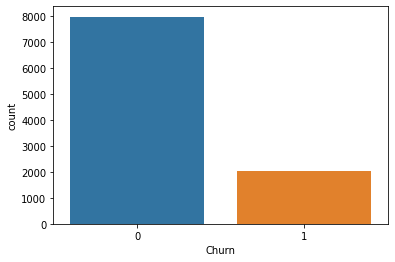

In [30]:
sns.countplot(x ='Churn', data =df);

In [31]:
x.shape, y.shape

((10000, 11), (10000,))

# Random Under Sampling

In [32]:
from imblearn.under_sampling import RandomUnderSampler

In [33]:
rus = RandomUnderSampler(random_state=2529)

In [34]:
x_rus, y_rus = rus.fit_resample(x,y)

In [35]:
x_rus.shape, y_rus.shape, x.shape, y.shape

((4074, 11), (4074,), (10000, 11), (10000,))

In [36]:
y.value_counts()

0    7963
1    2037
Name: Churn, dtype: int64

In [37]:
y_rus.value_counts()

0    2037
1    2037
Name: Churn, dtype: int64

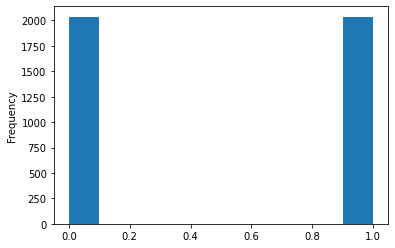

In [38]:
y_rus.plot(kind = 'hist')

# Train Test Split

In [39]:
from sklearn.model_selection import train_test_split

# Split Original Data

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=12529)

# Split Random Under Sample Data

In [41]:
x_train_rus, x_test_rus,y_train_rus, y_test_rus = train_test_split(x_rus,y_rus,test_size=0.3,random_state=12529)

# Standardize Features

In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
sc = StandardScaler()

# Standardize Original Data

In [44]:
x_train[['CreditScore','Age','Tenure','Balance','Estimated Salary']] = sc.fit_transform(x_train[['CreditScore','Age', 'Tenure', 'Balance','Estimated Salary']])

In [45]:
x_test[['CreditScore','Age','Tenure','Balance','Estimated Salary']] = sc.fit_transform(x_test[['CreditScore','Age','Tenure','Balance', 'Estimated Salary']])

# Support Vector Machine Classifier

In [46]:
from sklearn.svm import SVC

In [47]:
svc = SVC()

In [48]:
svc.fit(x_train, y_train)

SVC()

In [49]:
y_pred = svc.predict(x_test)

# Model Acurracy

In [50]:
from sklearn.metrics import confusion_matrix, classification_report

In [51]:
confusion_matrix(y_test, y_pred)

array([[2321,   31],
       [ 491,  157]])

In [52]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.99      0.90      2352
           1       0.84      0.24      0.38       648

    accuracy                           0.83      3000
   macro avg       0.83      0.61      0.64      3000
weighted avg       0.83      0.83      0.79      3000



# HyperParametric Tunning

In [53]:
from sklearn.model_selection import GridSearchCV

In [54]:
param_grid = {'C':[0.1,1,10],
               'gamma': [1,0.1,0.01],
               'kernel': ['rbf'],
               'class_weight': ['balanced']}
            

In [55]:
grid = GridSearchCV(SVC(),param_grid, refit=True,verbose=2, cv = 2)
grid.fit(x_train, y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.8s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.7s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.4s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.5s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.5s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.1s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.1s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.2s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [56]:
print(grid.best_estimator_)

SVC(C=10, class_weight='balanced', gamma=1)


In [57]:
grid_predictions = grid.predict(x_test)

In [58]:
confusion_matrix(y_test,grid_predictions)

array([[2116,  236],
       [ 427,  221]])

In [59]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      2352
           1       0.48      0.34      0.40       648

    accuracy                           0.78      3000
   macro avg       0.66      0.62      0.63      3000
weighted avg       0.76      0.78      0.76      3000



# Model With Random Under Sampling

In [60]:
svc_rus = SVC()

In [61]:
svc_rus.fit(x_train_rus,y_train_rus)

SVC()

In [62]:
y_pred_rus = svc_rus.predict(x_test_rus)

# Model Accuracy

In [63]:
confusion_matrix(y_test_rus,y_pred_rus)

array([[236, 363],
       [157, 467]])

In [64]:
print(classification_report(y_test_rus, y_pred_rus))

              precision    recall  f1-score   support

           0       0.60      0.39      0.48       599
           1       0.56      0.75      0.64       624

    accuracy                           0.57      1223
   macro avg       0.58      0.57      0.56      1223
weighted avg       0.58      0.57      0.56      1223



# Hyperparameter Tunning

In [65]:
param_grid = {'C':[0.1,1,10],
              'gamma':[1,0.1,0.01],
              'kernel':['rbf'],
              'class_weight' : ['balanced']}

In [66]:
grid_rus = GridSearchCV(SVC(),param_grid, refit=True,verbose=2, cv = 2)
grid_rus.fit(x_train_rus, y_train_rus)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.2s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.2s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.2s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.2s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.2s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [67]:
print(grid_rus.best_estimator_)

SVC(C=1, class_weight='balanced', gamma=1)


In [68]:
grid_predictions_rus = grid_rus.predict(x_test)

In [ ]:
confusion_matrix(y_test_rus,y_pred_rus)

array([[253, 374],
       [151, 445]])

In [ ]:
print(classification_report(y_test_rus, y_pred_rus))

              precision    recall  f1-score   support

           0       0.63      0.40      0.49       627
           1       0.54      0.75      0.63       596

    accuracy                           0.57      1223
   macro avg       0.58      0.58      0.56      1223
weighted avg       0.59      0.57      0.56      1223

